<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/18_03_24_ROC1internetfundusimage_VGG16model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split')

['train', 'val', 'test']

In [63]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/train')

['RE fundus', 'LE fundus']

In [76]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/train',
                                          target_size=(64,64))
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/val',
                                          target_size=(64,64))
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/test',
                                          target_size=(64,64))

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [77]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights='imagenet',
                               input_shape=(64,64,3))
VGG.trainable=False

In [78]:
from keras.models import Sequential
model = Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               524544    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 2)                 514       
                                                                 
Total params: 15305538 (58.39 MB)
Trainable params: 590850 (2.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [98]:
model.fit(trainimages,
          batch_size=10,
          epochs=50,
          validation_data=valimages)
model.save('internetfundusimagesVGG_model.keras')


Epoch 1/50
3/3 [==============================] - 9s 2s/step - loss: 3.9022e-06 - accuracy: 1.0000 - val_loss: 0.7406 - val_accuracy: 0.9000
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 3.7652e-06 - accuracy: 1.0000 - val_loss: 0.7415 - val_accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 6s 1s/step - loss: 3.6207e-06 - accuracy: 1.0000 - val_loss: 0.7423 - val_accuracy: 0.9000
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 3.4598e-06 - accuracy: 1.0000 - val_loss: 0.7430 - val_accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 8s 2s/step - loss: 3.4195e-06 - accuracy: 1.0000 - val_loss: 0.7436 - val_accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 3.2855e-06 - accuracy: 1.0000 - val_loss: 0.7439 - val_accuracy: 0.9000
Epoch 7/50
3/3 [==============================] - 6s 1s/step - loss: 3.2050e-06 - accuracy: 1.0000 - val_loss: 0.7442 - val_accuracy: 0.9000
Epoch 8/50
3/

In [99]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 1s 803ms/step


array([[8.92189026e-01, 1.07810967e-01],
       [9.43713725e-01, 5.62862456e-02],
       [9.98357177e-01, 1.64288154e-03],
       [9.96492863e-01, 3.50702601e-03],
       [9.99998987e-01, 9.01529290e-07],
       [2.15255562e-03, 9.97847438e-01],
       [2.67994693e-09, 9.99999940e-01],
       [7.06143165e-03, 9.92938638e-01],
       [1.80130986e-08, 1.00000000e+00],
       [1.15031615e-01, 8.84968340e-01]], dtype=float32)

In [100]:
y_pred1 = np.argmax(y_pred,axis = 1)
y_pred1

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [88]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [89]:
testimages.class_indices

{'LE fundus': 0, 'RE fundus': 1}

In [101]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[5, 0],
       [0, 5]])

In [102]:
print(metrics.classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



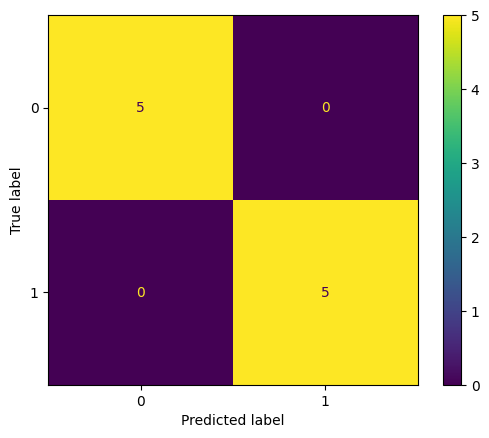

In [103]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

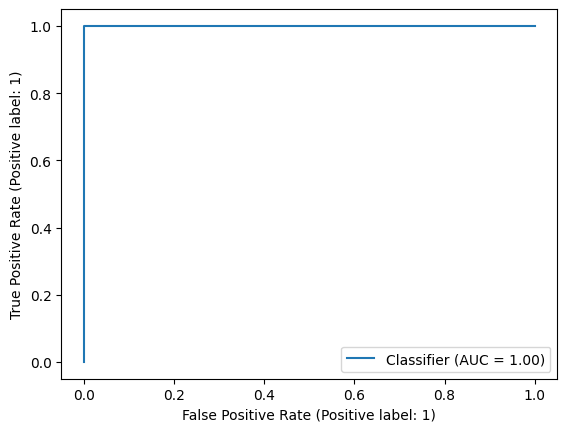

In [104]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred1)

1/1 [==============================] - 0s 222ms/step
Prediction: RE fundus


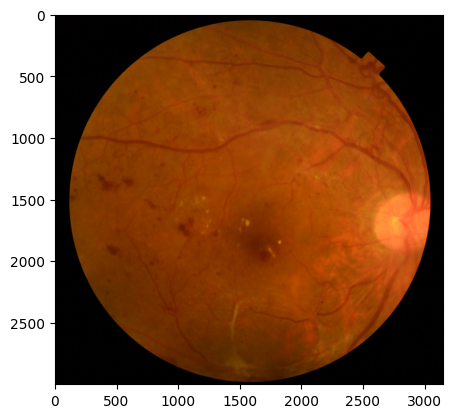

In [108]:
from keras.preprocessing import image
from keras.models import load_model

# Load the trained CNN model
model = load_model('/content/internetfundusimagesVGG_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["LE fundus", "RE fundus"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images 27022024/1ffa92ea-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/DR fundus images 27022024/1ffa92ea-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 73ms/step
Prediction: RE fundus


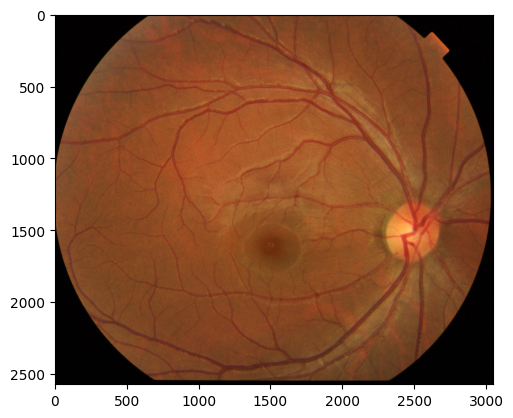

In [106]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/3324fundus laterality images/split/test/RE FUNDUS/1ffa965b-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/3324fundus laterality images/split/test/RE FUNDUS/1ffa965b-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

1/1 [==============================] - 0s 72ms/step
Prediction: RE fundus


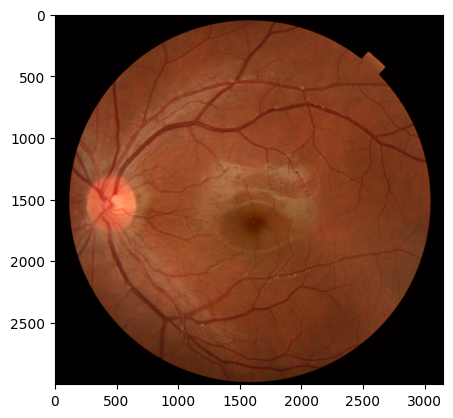

In [113]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Normal Fundus Images/left eye fundus/1ffa962b-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage =image.load_img('/content/drive/MyDrive/Normal Fundus Images/left eye fundus/1ffa962b-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)